References:
- Original X post: https://x.com/yuruyurau/status/1942231466446057727
- Wolfram community post: https://community.wolfram.com/groups/-/m/t/3516580
- LinkedIN post: https://www.linkedin.com/posts/kaurov_how-should-we-%F0%9D%90%A7%F0%9D%90%9A%F0%9D%90%A6%F0%9D%90%9E-%F0%9D%90%AD%F0%9D%90%A1%F0%9D%90%A2%F0%9D%90%AC-%F0%9D%90%9C%F0%9D%90%AB%F0%9D%90%9E%F0%9D%90%9A%F0%9D%90%AD%F0%9D%90%AE%F0%9D%90%AB%F0%9D%90%9E-activity-7353422823295467520-YDgs/

Precomputing frames...
Creating animation...
Saving GIF...
Animation saved as 'creature.gif'


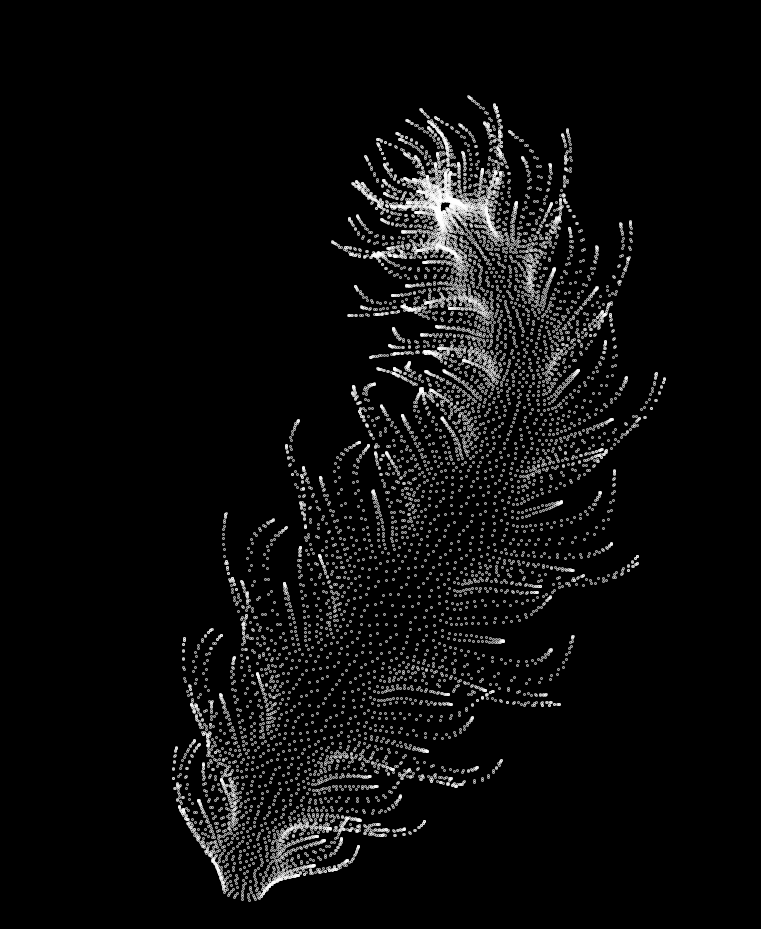

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import to_rgb

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)  # Higher DPI for better quality
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.set_xlim(70, 330)
ax.set_ylim(350, 30)  # Inverted y-axis to match original
ax.set_aspect('equal')
ax.axis('off')

# Dark background (matches Wolfram's GrayLevel[9/255])
bg_color = to_rgb('#000000')
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Precompute all points for animation (memory efficient)
num_frames = 150
num_points = 10000
t_values = np.linspace(0, 2*np.pi, num_frames)

# Precompute base values
i_vals = np.arange(num_points)
x = i_vals
y = i_vals / 235.0

# Pre-allocate arrays
xp_all = np.zeros((num_frames, num_points))
yp_all = np.zeros((num_frames, num_points))

# Compute all frames
print("Precomputing frames...")
for frame_idx, t in enumerate(t_values):
    # Intermediate calculations
    k = (4 + np.sin(x/11 + 8*t)) * np.cos(x/14)
    e = y/8 - 19
    d = np.sqrt(k**2 + e**2) + np.sin(y/9 + 2*t)
    q = 2*np.sin(2*k) + np.sin(y/17)*k*(9 + 2*np.sin(y - 3*d))
    c = d**2/49 - t
    
    # Final coordinates
    xp = q + 50*np.cos(c) + 200
    yp = q*np.sin(c) + 39*d - 440
    
    # Store results with y-inversion
    xp_all[frame_idx] = xp
    yp_all[frame_idx] = 400 - yp

# Create initial scatter plot
scatter = ax.scatter(xp_all[0], yp_all[0], s=0.1, 
                     color='white', alpha=0.9, rasterized=True)

# Animation update function
def update(frame):
    scatter.set_offsets(np.column_stack((xp_all[frame], yp_all[frame])))
    return [scatter]

# Create animation
print("Creating animation...")
ani = FuncAnimation(fig, update, frames=num_frames, 
                    blit=True, interval=33)

# Save as GIF
print("Saving GIF...")
# ani.save('creature.gif', writer=PillowWriter(fps=30), 
#          dpi=100, savefig_kwargs={'facecolor': bg_color})

ani.save('creature.gif', 
         writer='pillow',  # Use pillow directly
         fps=30,
         dpi=150,
         savefig_kwargs={'facecolor': bg_color}
         )
print("Animation saved as 'creature.gif'")